In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
observation_data = pd.read_csv('observations.csv')
species_info_data = pd.read_csv('species_info.csv')

In [51]:
observation_data = observation_data.sort_values(by=['park_name', 'observations'])
observation_count = observation_data.groupby('scientific_name')['observations'].sum().reset_index()

nan_observation_count = observation_count.isna().sum()
print(nan_observation_count)
display(observation_count.head())

scientific_name    0
observations       0
dtype: int64


,scientific_name,observations
0,Abies bifolia,532
1,Abies concolor,630
2,Abies fraseri,518
3,Abietinella abietina,592
4,Abronia ammophila,523


In [52]:
species_info_data = species_info_data.fillna('Normal')
species_info_data = species_info_data.drop('common_names', axis=1)
species_info_data.reset_index(drop=True, inplace=True)
print(len(species_info_data))
species_info_data.head()

5824


,category,scientific_name,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Normal
1,Mammal,Bos bison,Normal
2,Mammal,Bos taurus,Normal
3,Mammal,Ovis aries,Normal
4,Mammal,Cervus elaphus,Normal


In [53]:
species_observation_merge = pd.merge(observation_count, species_info_data, on='scientific_name', how='left')
species_observation_merge.head()

unique_category = species_observation_merge['category'].value_counts()
print(unique_category)


Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


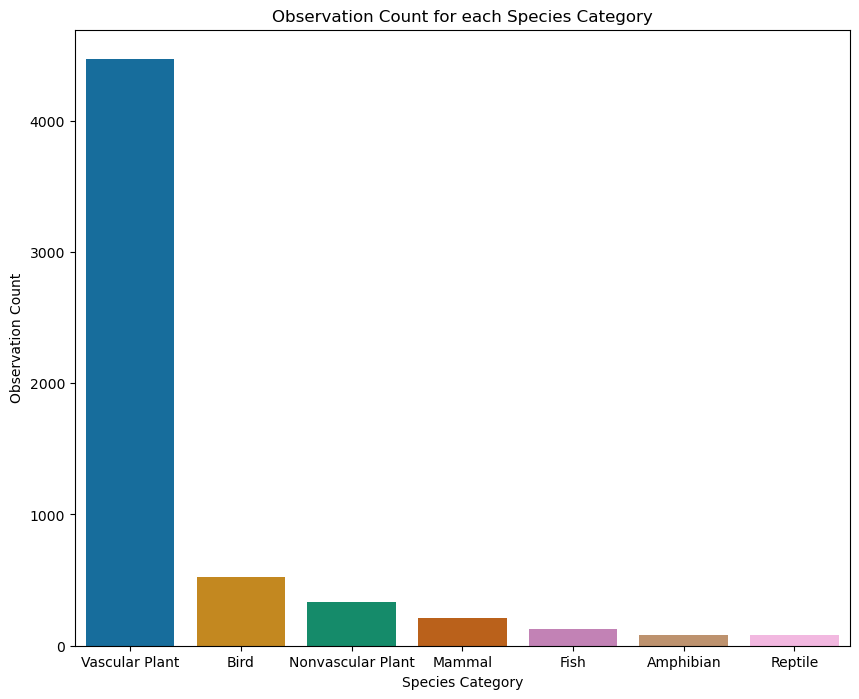

<Figure size 640x480 with 0 Axes>

In [54]:
color = sns.color_palette('colorblind')

plt.figure(figsize= (10, 8))
sns.barplot(x=unique_category.index, y=unique_category, palette=color)
plt.xlabel('Species Category')
plt.ylabel('Observation Count')
plt.title('Observation Count for each Species Category')
plt.show()
plt.clf()

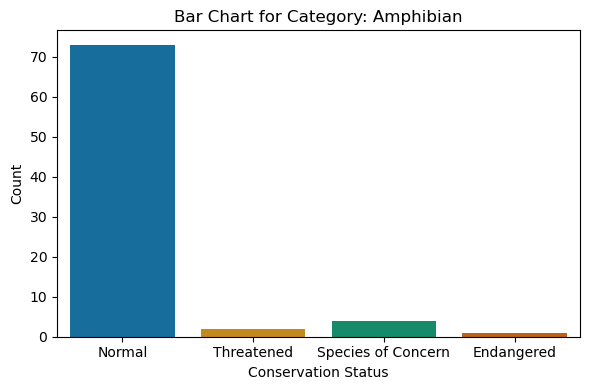

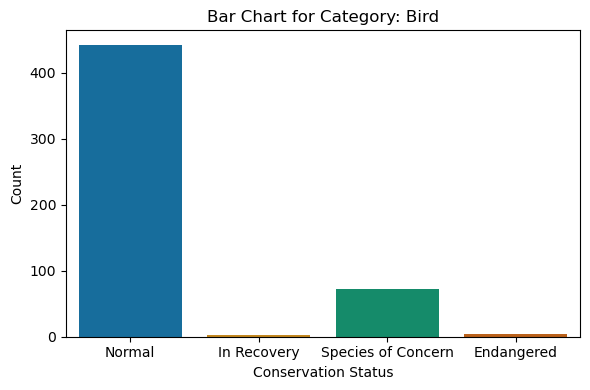

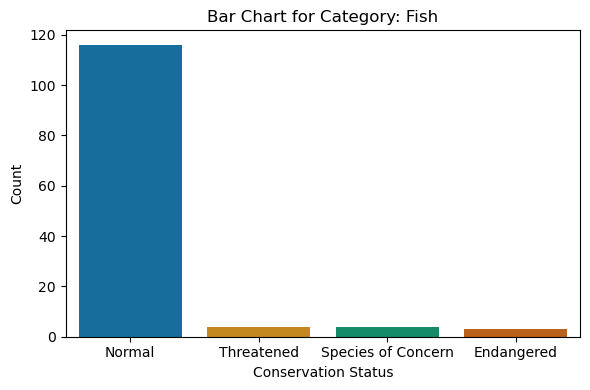

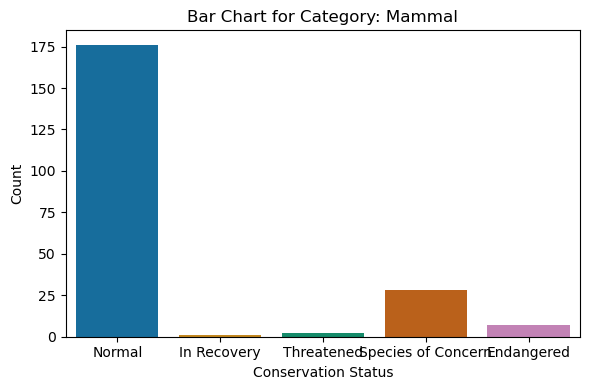

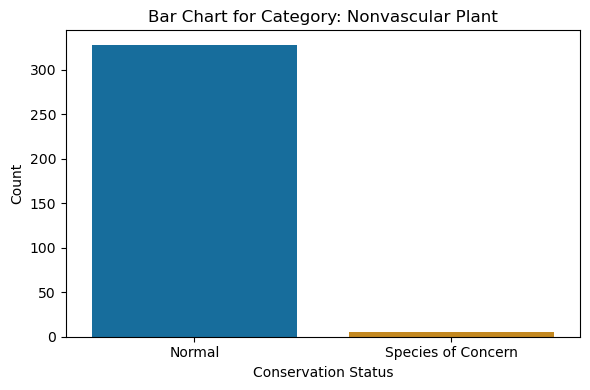

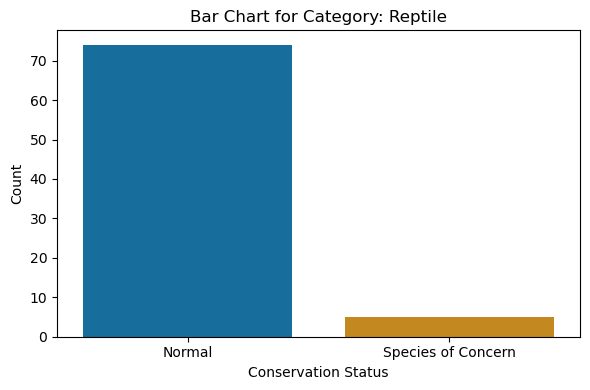

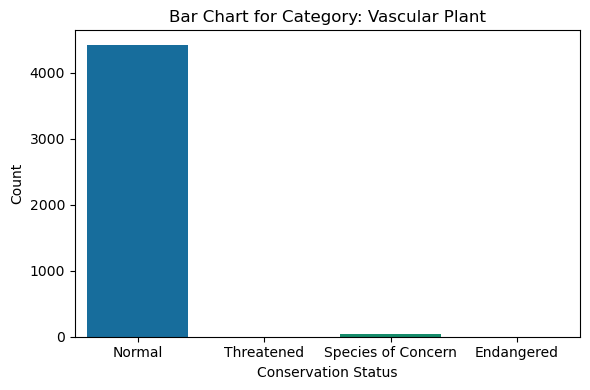

In [65]:


status_order = ['Normal', 'In Recovery', 'Threatened', 'Species of Concern', 'Endangered']

grouped_data = species_observation_merge.groupby(['category', 'conservation_status']).size().unstack()

grouped_data = grouped_data.reset_index(drop=False)
grouped_data = grouped_data.fillna(0)

for category in grouped_data['category']:
    data = grouped_data[grouped_data['category'] == category]
    melted_data = data.melt(id_vars='category', value_vars=status_order, var_name='conservation_status', value_name='count')
    melted_data = melted_data[melted_data['count'] > 0]

    plt.figure(figsize=(6, 4))
    sns.barplot(data=melted_data, x='conservation_status', y='count', palette='colorblind')
    plt.xlabel('Conservation Status')
    plt.ylabel('Count')
    plt.title(f'Bar Chart for Category: {category}')

    plt.tight_layout()
    plt.show()